# linreg_interpolation
+ [Introduction to Linear Regression in Python](https://towardsdatascience.com/c12a072bedf0)
+ [Linear Interpolation in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.02-Linear-Interpolation.html)
+ [Lagrange Polynomial Interpolation in Python](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html)

## questions

### part a (in-class)
1. Write equations of $c_0$ and $c_1$ as implementation of linear regression to  $y = c_0 + c_1 x$.
2. Write equation of linear interpolation for pairs of data $\{ (x_i, y_i) \ | \ i = 1, 2, \dots, n \}$.
3. Write equation of Lagrange polynomial interpolation for pairs of data $\{ (x_i, y_i) \ | \ i = 1, 2, \dots, n \}$.
4. Explain the difference between linear regression and interpolation for the data.

### part b (take-home)
1. Write function `linear_regression()` to calculate `c_0` and `c_1` with input parameters are `x` and `y`, where both are `list` with the same length.
2. Write functions `linear_interpol()` to calculate linear interpolation with input parameters are `x` and `y`, where both are `list` with the same length.
3. Write functions `lagrange_interpol()` to calculate Lagrange polynomial interpolation with input parameters are `x` and `y`, where both are `list` with the same length.
4. Plot curves using, directly or indirectly, the functions `linear_regression()`, `linear_interpol()`, `lagrange_interpol()`, and the data `x` and `y`. Set right label to each series and show them in the plot legend.

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell.
+ There should be **at least four cells (Code cells)**.
+ Existence of additional Markdown cells for explanation are optional.

Set data yang digunakan terdiri dari
$$
(3,2), (4,5), (5,12), (10,13), (12,20)
$$

In [1]:
# Mendifinisikan data
x = [3, 4, 5, 10, 12]
y = [2, 5, 12, 13, 20]

### Regresi Linear

In [2]:
import math
import numpy as np
def sum_product(a, b):
    N = min(len(a), len(b))
    s = 0
    for i in range(N):
        s += a[i]*b[i]
    return s

def f(x, c):
    y = []
    for i in x:
        y.append(c[0] + c[1] * i)
    return y

def avg(a):
    N = len(a)
    s = sum(a)
    abar = s / N
    return abar

def SSres(x, y, c):
    N = min(len(x), len(y))
    ymod = f(x, c)
    s = 0
    for i in range(N):
        s += (y[i] - ymod[i])**2
    return s

def SSab(x, y):
    N = min(len(x), len(y))
    ax = avg(x)
    ay = avg(y)
    s = 0
    for i in range(N):
        s += (x[i] - ax) * (y[i] - ay)
    return s

N = len(x)

Sy = sum(y)
Sx = sum(x)
Sxx = sum_product(x, x)
Sxy = sum_product(x, y)

c_0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c_1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c_0,c_1]
y_lin = f(x,c)

### Interpolasi Linear

In [3]:
def q(j, x, xdata, ydata):
    q1 = ydata[j+1] * (x - xdata[j]) / (xdata[j+1] - xdata[j])
    q2 = ydata[j] * (x - xdata[j+1]) / (xdata[j] - xdata[j+1])
    qjx = q1 + q2
    return qjx

import math
def p(x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    h = xdata[1] - xdata[0]
    j = math.floor((x - xdata[0]) / h)
    if j >= n - 1: j = n - 2
    px = q(j, x, xdata, ydata)
    return px

def linear_interpolation(x, xdata, ydata):
    y = [p(i, xdata, ydata) for i in x]
    return y

x_inter = np.linspace(0, 14, 100).tolist()
y_inter = linear_interpolation(x_inter, x, y)

### Interpolasi Polinomial Lagrange

In [4]:
def q(j, x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    prod = 1
    for k in range(n):
        if k != j:
            prod *= (x - xdata[k]) / (xdata[j] - xdata[k])
    qjx = ydata[j] * prod
    return qjx

def p(x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    px = 0
    for j in range(n):
        px += q(j, x, xdata, ydata)
    return px

def lagrange_polynomial(x, xdata, ydata):
    y = [p(i, xdata, ydata) for i in x]
    return y

x_lag = np.linspace(0, 14, 100).tolist()
y_lag = lagrange_polynomial(x_lag, x, y)

### Plot Kurva

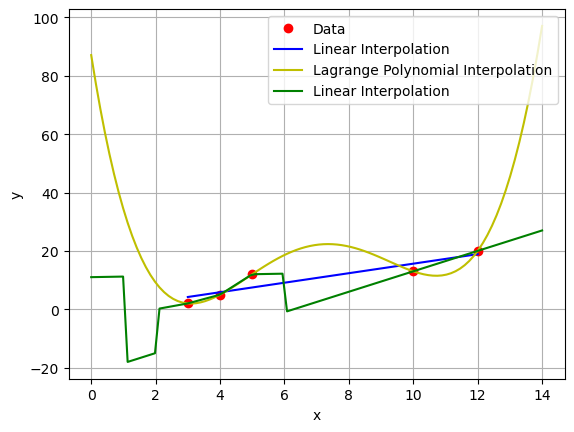

In [5]:
import matplotlib.pyplot as plt

plt.grid()
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, y, 'ro', label="Data")
plt.plot(x, y_lin, 'b-', label="Linear Interpolation")
plt.plot(x_lag, y_lag, 'y-', label="Lagrange Polynomial Interpolation")
plt.plot(x_inter, y_inter, 'g-', label="Linear Interpolation")
plt.legend(loc="upper right")
plt.show()